# PAMD computer workshop week 11

In this last installment of your PAMD workshops we will look at implementing neural networks. You will remember from the lecture that broadly speaking, a neural network consists of an input and an output layer of neurons which are connected with a number of hidden layers.

The maybe easiest way to build an ANN in Python is through Keras.

Keras is a Python interface that focuses on neural networks and especially shines for deep learning implementations. It was built on top of [TensorFlow](https://tensorflow.org/), which in turn was originally written for internal uses at Google but has since become a large open source software library for machine learning. Keras is an interface to make it easier to use, which makes it a very popular choice for ANN implementations with plenty of customization options. You'll remember from the lecture how many choices can be made regarding the structure and the tuning of a neural network. Keras will help us with that. Have a brief look at their extensive documentation [here](https://keras.io/about/). These easy to use libraries are arguably one of the reasons why neural networks have been so popular.

On the Keras website there's tutorials for both simple implementations like the ones we're doing in class here, but also more advanced options such as parallel processing and recurrent ANNs which are used for example in Natural Language Processing (NLP) for those of you interested in diving deeper after the course.

This script will construct a simple neural network for our churn data. Remember that churn reflects whether a customer will stop buying a product from a company.

In [1]:
# you might need to install tensorflow and keras first. This may take a few minutes

# %pip install tensorflow
# %pip install keras

^C
     ------------------------------------ 997.1/997.1 kB 279.4 kB/s eta 0:00:00
     ------------------------------------ 130.2/130.2 kB 641.5 kB/s eta 0:00:00
     ------------------------------------ 240.6/240.6 kB 433.9 kB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 319.2 kB/s eta 0:00:00
     ------------------------------------ 101.3/101.3 kB 446.5 kB/s eta 0:00:00
     -------------------------------------- 87.5/87.5 kB 275.0 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 300.9/300.9 MB 1.5 MB/s eta 0:00:00
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
  Using cached h5py-3.10.0-cp311-cp311-win_amd64.whl (2.7 MB)
     -------------------------------------- 24.4/24.4 MB 120.0 kB/s eta 0:00:00
     ------------------------------------- 938.7/938.7 kB 87.3 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 87.8 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 66.0 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 207.3 kB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 190.9 kB/s eta 0:00:00
     ------------------------------------ 442.0/442.0 kB 368.4 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 971.5 kB/s eta 0:00:00
     ------


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('churn_ibm.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


You already know our usual pre-processing steps by now, right?

In [11]:
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

for column in X.columns:
    if X[column].dtype == object:
        X = pd.concat(
            [X, pd.get_dummies(X[column], prefix=column, drop_first=True)], axis=1
        ).drop([column], axis=1)

# Also for neural networks, it's best to scale the input variables. In contrast to decision trees with which,
# we've analysed churn data in the past, ANNs are more sensitive to scaling issues.

X = StandardScaler().fit_transform(X)
y = pd.get_dummies(y, prefix="churn", drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Section 1 - Demo: Building a two-layer feed-forward ANN

We'll now build a neural network with two hidden layers using Keras. Have a look at the implementation example [here](https://keras.io/guides/sequential_model/).

Notice when we can use the sequential model structure:
- we have one input (our dataframe X)
- we have one output (our data vector y)

The code example shows you exactly how to build layers. If we want to build a model with three layers, the example suggests to write 

`model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)`

You define each layer in terms of the number of neurons it has (here: 2, 3 and 4), whether it is a dense layer (that is, each neuron in the previous layer is connected with each neuron in the next layer), and its activation function (here, relu). Pretty straightforward, right? 

The model can be built in one go, or you can use the add() function to add layers sequentially if you prefer. I will demonstrate the sequential way below.

Note that you have to specify the shape of the input and output in your network. The example on the website does that a bit later. For our example, the shapes are 'X_train.shape[1]' and 'y_train.shape[1]'.

**DEMO**

For this example, I will demonstrate one way of building a two layer neural network for our churn data. You can use this example for the later tasks where you will have to build them yourself. If you would prefer to try it yourself instead of seeing my example, just skip the following cells.

In [13]:
import tensorflow as tf
import keras
from keras import layers

from keras.models import Sequential
from keras.layers import Dense, Activation

# I save input and output dim as variables, because that makes it easier to read the code
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
print('Input dimension: ', input_dim)
print('Output dimension: ', output_dim)

# Create a model instance (Sequential, as we add each layer in order of appearance)
model = Sequential()

# Add the input layer and connect to 50 hidden neurons; this is your first hidden layer
model.add(Dense(50,input_dim=input_dim))

# Connect the neurons to the next 50 neurons; this is your second hidden layer
model.add(Dense(50))

# Connect the previous layer to the output layer; note we specify the output dimensions here (the dimension of our y)
# and we use a sigmoid activation function here because that allows us the binary classification for our example
model.add(Dense(output_dim, activation='sigmoid'))

# Create the model with an optimizer, loss function, and evaluation metric.
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

# We'll make some changes to these later, but for now we use Stochastic Gradient Descent (SGD) as an optimizer,
# cross entropy as a cost function (remember that we are classifying, so cross entropy is appropriate here;
# in a regression problem you would want to use for example MeanSquaredError) 
# and we want the network to be evaluated by its accuracy (other choices would be for example recall or 
# precision)

Input dimension:  30
Output dimension:  1


In [14]:
# fit the above specified model with the training data
model.summary()
model.fit(X_train,y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1550      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4151 (16.21 KB)
Trainable params: 4151 (16.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
154/154 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.7328


The first part of the output shows the structure of your network: You'll see that we have two dense hidden layers with 50 nodes each, as well as one output layer of size 1 which has a sigmoid activation function to transform our output into probabilities.

The total number of parameters that the model has to estimate is 4,151

In [20]:
# Test the model on our test data and obtain the results as predicted probabilities
prediction_prob = model.predict(X_test)
print(prediction_prob)

# Also obtain the results as a class (here 0/1)
classes=(prediction_prob > 0.5).astype("int32")
print(classes)

66/66 [==============================] - 0s 1ms/step
[[0.19694075]
 [0.46259588]
 [0.07692411]
 ...
 [0.46841094]
 [0.05810777]
 [0.14887425]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [22]:
# Print our test accuracy and model AUC
print('Accuracy:', accuracy_score(y_test,classes))
print('AUC:',roc_auc_score(y_test,prediction_prob))

Accuracy: 0.8009478672985783
AUC: 0.8424326259415186


The example above demonstrates how to build quite a complex model, but you can see how easy it is using Keras. Let's use this as a basis for the following exercise.

# Section 2: Experimenting with Kernels and activation functions

We've discussed in class that one of the advantages of neural networks lies in their ability to capture nonlinearity. We'll see that in action now as we try to classify a circular dataset.

For that we will use kernels to capture nonlinearity. You've seen this work before in Support Vector Machines. I like to imagine kernels as a way to "push" data into other feature spaces to allow us to separate it. The Wikipedia article on kernel machines (https://en.wikipedia.org/wiki/Kernel_method) has a very intuitive picture for that process: if we have a scatterplot in two dimensions, we can "push" a kernel through that cloud of dots in order to separate them. Points of one class are suddenly pushed upwards into the new dimension as they are "on top" of the kernel shape. We are expanding the dimensions by one using the kernel and can now find a linear classifier that cuts through the kernel, separating the points "on top" from those "on the bottom". Different kernel shapes exist for different scenarios.

### 2.1 Creating data

Let's generate some data to see how this same trick is applied in neural networks.

          x         y  label
0 -0.644237 -0.499223      1
1 -0.731903  0.306556      1
2  0.831473  0.289985      1
3 -0.686173 -0.415812      1
4 -0.720533  0.293860      1


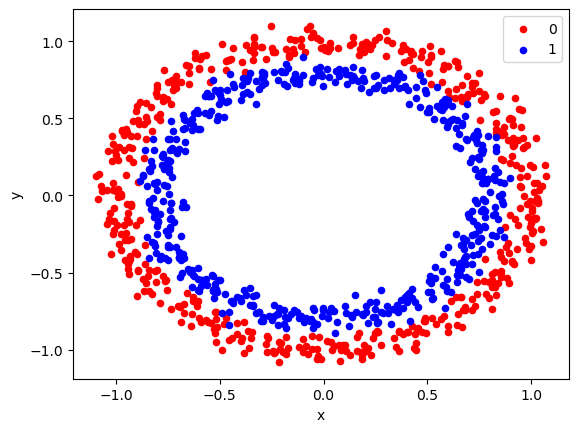

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles, make_checkerboard
import matplotlib.pyplot as plt

# scikit-learn offers a method to create a dataset perfect for this task by using make_circles
X, y = make_circles(n_samples=1000, noise=0.05)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

print(df.head())

# Plotting the dataset
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

You can see that this will be a tricky example for any linear classifier. There's no way of drawing a line through this space to separate the two classes. A SVM might work well and, as we will see in this example, a neural network handles it well too.

Let's split our data as usual.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### 2.2 Neural Network with linear Kernel

Now, we create a neural network with two hidden layers (just like before) but now, instead of just using a sigmoid layer at the very end, we are adding linear layers to the network. This will help us understand how well a binary classifier would work for the data earlier.

The other thing I would like you to try here is to run multiple epochs. One epoch refers to one complete run of the whole training dataset through the network. You'll remember that we're running through forward once and then backward once to update our weights and biases (backpropagation). When we've completed that cycle, we've run one epoch. Running multiple epochs (by then pushing the same data through again) can improve the performance of your network, so it's common to run at least a few. You can specify this in the model.fit() function.

**TASK**
- Build a neural network with two hidden layers like in Section 1
- But: Use a linear activation function in each hidden layer
- Use a sigmoid activation function in the last layer to get a probability outcome for binary classification
- Run the model for 100 epochs
- Calculate accuracy/AUC

In [1]:
# YOUR CODE HERE

You will hopefully notice that your model does not perform well. This is to be expected: We are de facto trying to fit a linear classifier to the data, which we could clearly see in our plot is not linearly dividable. 

So, let's try this again. But this time, we will use a different kernel.

### 2.3 Neural network with ReLu activation function

There's a lot of different activation function to choose from. You can find them in the Keras documentation [here](https://keras.io/api/layers/activations/). We've already seen sigmoid and linear in action. This time, we will use a ReLU function in the hidden layers and a sigmoid function in the output layer.

**TASK**

Repeat the model from 2.2, but change the activation functions:
- ReLU function in hidden layers
- sigmoid function in output layer

Compare the model performance to the model in 2.2

In [2]:
# YOUR CODE HERE

What do you find? You might notice that your ReLU Kernel is doing marginally better than the linear one. Mine does reasonably well (accuracy around 80%) as long as I run the model multiple epochs (around 100). You can experiment with the impact that activation function and number of epochs has on your model performancae.

# Section 3: Building neural networks for regression

So far we have focused on classification into two classes with neural networks. Now, we will look at the use of neural networks for regression problems. We're going back to our diabetes progression dataset that we've seen in our regression tree building. 

We will also talk about learning rate - one of the parameters that you can choose in building your network. The learning rate refers to how strongly the model is changed during each of the weights/biases update step of backpropagation. We'll talk about it more later in this script.

In [90]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

dataset = load_diabetes()

X = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])

y = pd.DataFrame(data=dataset['target'],columns=['progression'])

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Scale the training and the test data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit(X_train).transform(X_test)


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


The main difference in building a regression neural network versus a classification one is 1) how we choose the activation functions and 2) how we choose the loss function.

Regarding 1), we don't need the sigmoid function for the binary classification anymore. And regarding 2) remember that in Section 2 we used binary_crossentropy for loss. This time we obtain a metric that can be used for regression, the mean squared error, instead. We also use this as a metric for reporting, instead of accuracy. You can calculate it using the mean_squared_error function in sklearn.metrics, as we've done before.

Just to learn something new we now also use a different optimiser (instead of stochastic gradient descent) which works better in this instance and run just 10 epochs to save computing time. You can read more about different optimizers [here](https://keras.io/api/optimizers/) if you're curious.

**TASK**

- Build a neural network with one hidden layer to predict y
- Choose mean squared error for the loss function and performance outcome
- Use 'adam' as the optimizer for the model instead of 'sgd'
- Run the model for 10 epochs

Note that our `output_dim = 1` as we are predicting a single real number per observation.


In [3]:
# YOUR CODE HERE

Take a look at the output of the model and how it shows for each epoch how the mean squared error is decreasing. You can watch how the model is learning each round it runs.

# Section 4: Feature importance

Remember that in the lecture we said that neural networks are great, but they are quite black box models. That means, it's not immediately clear how they reach a certain conclusion and interpreting them is difficult.

One way of getting at least some clarity is by looking at the feature importance. This tells you which variable impacted the predicted output the most, i.e. on which variable the neural network relied more or less to reach its conclusion.

**OPTIONAL TASK**

Look into the [eli5](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html) package for calculating feature importance. You can try implementing it below for our first model on customer churn (Section 1) or for the diabetes example (Section 3). The main difference will be the scoring function which you should use. Remember that the first example was a classification task, while the second was a regression task.

In [ ]:
# YOUR CODE HERE